# Email Spam Classification

Importing the necessary modules 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

reading the csv file which contains the data


In [ ]:

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

selecting the required columns from the dataframe.

In [ ]:

df = pd.DataFrame(df.iloc[:,:2]).rename(columns = {"v1":"class", "v2":"text"})
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Here, since this is spam mail classification. it consists of text messages of either the text message is spam or not. so our labels that we need to predict is spam or ham(not spam). 

In [ ]:

df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

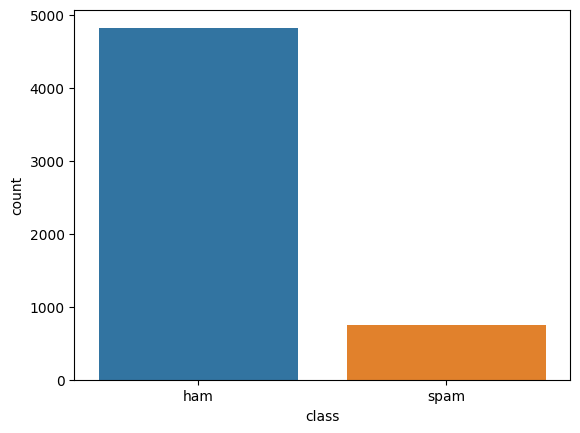

In [ ]:
sns.countplot(x = "class", data=df)

- From the bar graph you can observe that the spam mails are 747 and ham mails are 4825(which is far more than compared to 747). so we can apply either undersampling or oversampling. 
- The concept of oversampling is to increase the low majority label records to balance with high majority label records. for example: if there are 10 instances of true class and 100 instances of false class we will be adding 90 more true class instances inorder to balance it.
- The concept of undersampling is to decrease the number majority labels to balance with low majority records for example if there are 10 instances of true class and 100 instances of false class we will be removing 90 more false class instances inorder to balance it.
- Either one of them can be used based on situation demand. here i used oversampling.

In [ ]:

import numpy as np
from sklearn.utils import resample

majority_class = df[df['class'] == 'ham']
minority_class = df[df['class'] == 'spam']

oversampled_minority_class = resample(minority_class, replace=True, n_samples=majority_class.shape[0],  random_state=42)  

df = pd.DataFrame(np.concatenate((majority_class, oversampled_minority_class), axis=0), columns=['class','text'])


After oversampling of the instances, we can see that ham and spam labels are of same count.

In [ ]:
df['class'].value_counts()

ham     4825
spam    4825
Name: class, dtype: int64




applied regex to remove letters from the text that doesnt involve in our prediction.

In [ ]:

import re

df['text'] = df['text'].replace(to_replace = "[^a-zA-Z0-9\s]",value = '', regex = True)


using sklearn train_test_split to seperate the training data and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['class'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['class']
)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 7720
Testing set size: 1930


I used the TF-IDF vectorizer in my classification model because it assigns higher weights to words that are more important for making decisions. By doing so, the vectorizer helps me focus on the words that have a greater influence in the classification process

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

using svm model 

In [ ]:
from sklearn.svm import SVC
model = SVC(probability = True)
model.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))

[[964   1]
 [  1 964]]


In [ ]:
print("accuracy: ",accuracy_score(y_pred, y_test))

accuracy:  0.9989637305699481
